### Example: Face Recognition

• As an example of support vector machines in action, let's take a look at the facial recognition problem.

• We will use the Labeled Faces in the Wild dataset, which consists of several thousand collated photos of various public figures.

• A fetcher for the dataset is built into Scikit-Learn:

In [6]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


• Let's plot a few of these faces to see what we're working with:

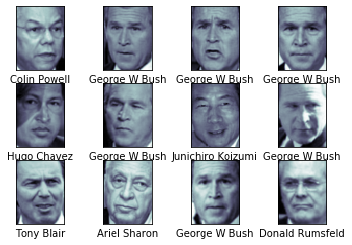

In [14]:
fig, ax = plt.subplots(3, 4)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap = 'bone')
    axi.set(xticks=[], yticks=[],
           xlabel = faces.target_names[faces.target[i]])

• Each image contains [62×47] or nearly 3,000 pixels.

• We could proceed by simply using each pixel value as a feature, but often it is more effective to use some sort of preprocessor to extract more meaningful features; here we will use a principal component analysis (see In Depth: Principal Component Analysis) to extract 150 fundamental components to feed into our support vector machine classifier.

• We can do this most straightforwardly by packaging the preprocessor and the classifier into a single pipeline:

In [15]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

• For the sake of testing our classifier output, we will split the data into a training and testing set:

In [16]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                               random_state=42)

• Finally, we can use a grid search cross-validation to explore combinations of parameters.

• Here we will adjust C (which controls the margin hardness) and gamma (which controls the size of the radial basis function kernel), and determine the best model:

In [18]:
from sklearn.model_selection import GridSearchCV
param_grid = {'scv__c' : [1, 5, 10, 50],
             'scv_gamma' : [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)
%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

/home/rajesh/my_project/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


ValueError: Invalid parameter scv for estimator Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=150,
                     random_state=42, svd_solver='auto', tol=0.0,
                     whiten=True)),
                ('svc',
                 SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False). Check the list of available parameters with `estimator.get_params().keys()`.

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'